***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 4**

***Problem 4.2***


***A 15x15 cm silicon solar cell has a short-circuit current $I_{sc}$ = 9 A under Standard Test Conditions (G=1000 W/m$^2$ and $T_{cell}$=25$^{\circ}$C). The dark saturation current is $I_0$ = 10$^{-10}$ A and the ideality factor $n$=1.***

***a) Plot the I-V curve of the solar cell under Standard Test Conditions. Assume $R_S$ = 0, $R_P$ = inf.***

***b) Plot the power produced as a function of the voltage. Determine the current and voltage at the maximum power point, the fill factor, and the efficiency of the solar cell.***

First, we import the Python modules used, define one constant to set the I-V curve data size, and define the Boltzman constant.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

DATA_SIZE = 500
kB = 8.617333e-5  # eV·K-1

We define the variables for the I-V curve data

In [2]:
# These are values in the usual range for a typical 16.6 x 16.6 cm2 Si solar cell
IL = 9.0 # A
I0 = 1e-10 # A
n = 1

temperature = 25  #ºC
cell_area = 15*15 # cm2

Now we define a function to calculate the I-V curve of the solar cell.
Note that we use a number of data points defined as the constant DATA_SIZE. The larger this number, the higher the precision, but also the longer computation time. Since the calculations are not very complex, you can use high numbers with almost instantaenous calculations in modern desktop computers or laptops.

In [3]:
def model_IV(IL, I0, n, Rs, Rp, temperature):
    # Thermal voltage
    kBT = kB*(temperature + 273.15)
    
    #I-V curve stored in a 2-column array: first column for voltages, second column for currents
    IVcurve = np.zeros((DATA_SIZE,2))
    
    # First, we calculate the I-V curve voltage range: from -0.1 V to Voc + 0.01 V
    # We want to have the I-V curve crossing the current and voltage axes to see the Isc and Voc
    # Voc without Rs/Rp.
    Voc0 = n*kBT*math.log(IL/I0)
    
    #Create the voltage list
    #Voltage range used: -0.1 to Voc+0.01
    IVcurve[:,0]= np.linspace(-0.1, Voc0+0.01, DATA_SIZE)
    
    #I-V curve without Rs effect
    IVcurve[:,1] = IL - I0*(np.exp(IVcurve[:,0]/(n*kBT))-1) - IVcurve[:,0]/Rp
    
    #Shift voltages to include Rs effect
    IVcurve[:,0] = IVcurve[:,0] - Rs*IVcurve[:,1]
    
    return IVcurve

We define another function to get the Pmax. Note that this function does not assume that the I-V curve is in the first quadrant. 

Another two functions are used to calculate the Isc and Voc and detect the quadrant. Then, the function calculating Pmax moves the I-V curve to this quadrant, if it is not there yet. 

In [4]:
# Obtains Isc by linear interpolation around V=0
def get_Isc(IVdata):
    """Returns the Isc of the input raw I-V curve"""

   # Sort data (interpolation function requires sorted data)
    IV_sorted = IVdata.copy()
    IV_sorted=IVdata[IVdata[:,0].argsort()] #Sort by voltages  
    
    Isc = np.interp(0,IV_sorted[:,0],IV_sorted[:,1])
    
    return Isc

# Obtains Voc by linear interpolation around I=0
def get_Voc(IVdata):
    """Returns the Voc of the input raw I-V curve"""

   # Sort data (interpolation function requires sorted data)
    IV_sorted = IVdata.copy()
    IV_sorted=IVdata[IVdata[:,1].argsort()]   #Sort by currents
    
    Voc = np.interp(0, IV_sorted[:,1],IV_sorted[:,0])
    
    return Voc

# Obtains the Pmax, and also the Vm and Im
def get_Pmax(IVdata):
  
   # Sort data and move to 1st quadrant
    IV_sorted = IVdata.copy()
 
    Isc = get_Isc(IV_sorted)
    if Isc<0:
        Isc*=-1
        IV_sorted[:,1]*=-1
    
    Voc = get_Voc(IV_sorted)
    if Voc<0:
        Voc*=-1
        IV_sorted[:,0]*=-1       
 
    IV_sorted=IV_sorted[IV_sorted[:,0].argsort()]   
   
 
    PV = IV_sorted.copy()
    PV[:,1] = IV_sorted[:,0]*IV_sorted[:,1]
    
    Pm = np.amax(PV[:,1])
    maxPosition = np.argmax(PV[:,1])
    Vm = PV[maxPosition,0]
    Im = IV_sorted[maxPosition,1]

    return Pm, Vm, Im

We can now plot the IV curve and calculate the most representative parameters

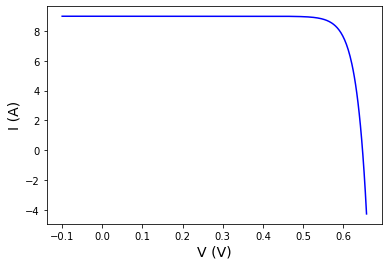

Solar cell with Imp=8.62A, Vmp=0.57V, FF=0.84, Efficiency=0.217


In [5]:
Rs = 0  # ohm
Rp = 1e10 # ohm

IV_curve = model_IV(IL, I0, n, Rs, Rp, temperature)
Pm, Vm, Im = get_Pmax(IV_curve)
Eff = Pm/(cell_area/10000*1000)
Voc = get_Voc(IV_curve)
Isc = get_Isc(IV_curve)
FF= Pm/(Isc*Voc)

# Plot the data
plt.plot(IV_curve[:,0], IV_curve[:,1], color='b')
plt.xlabel('V (V)', size=14)
plt.ylabel('I (A)', size=14)
plt.show()

# Report the values
sResult = ("Solar cell with " +
          "Imp=" + str(round(Im,2)) + "A, " +
          "Vmp=" + str(round(Vm,2)) + "V, " +
          "FF=" + str(round(FF,2))  + ", "
          "Efficiency=" + str(round(Eff,3)) )
print(sResult)

***c) Repeat steps 1 and 2 if the solar cell is now illuminated at 500 W/m$^2$. Compare the results.***

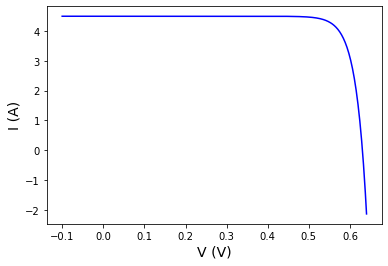

Solar cell with Imp=4.3A, Vmp=0.55V, FF=0.83, Efficiency=0.21


In [6]:
IL = 9/2 #If incident irradiance is divided by 2, the photogenerated current is also divided by 2. 
Rs = 0  # ohm
Rp = 1e10 # ohm

IV_curve = model_IV(IL, I0, n, Rs, Rp, temperature)
Pm, Vm, Im = get_Pmax(IV_curve)
Eff = Pm/(cell_area/10000*500)
Voc = get_Voc(IV_curve)
Isc = get_Isc(IV_curve)
FF= Pm/(Isc*Voc)

# Plot the data
plt.plot(IV_curve[:,0], IV_curve[:,1], color='b')
plt.xlabel('V (V)', size=14)
plt.ylabel('I (A)', size=14)
plt.show()

# Report the values
sResult = ("Solar cell with " +
          "Imp=" + str(round(Im,2)) + "A, " +
          "Vmp=" + str(round(Vm,2)) + "V, " +
          "FF=" + str(round(FF,2))  + ", "
          "Efficiency=" + str(round(Eff,3)) )
print(sResult)

***d) Repeat steps 1 and 2 if, due to a manufacturing defect, the parallel resistance is $R_P$=1 Ω.***

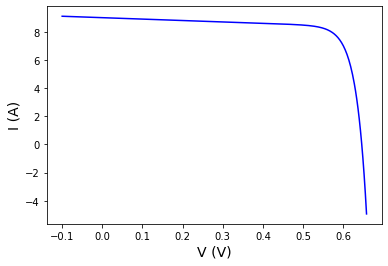

Solar cell with Imp=8.1A, Vmp=0.56V, FF=0.79, Efficiency=0.203


In [7]:
IL = 9
Rs = 0  # ohm
Rp = 1 # ohm

IV_curve = model_IV(IL, I0, n, Rs, Rp, temperature)
Pm, Vm, Im = get_Pmax(IV_curve)
Eff = Pm/(cell_area/10000*1000)
Voc = get_Voc(IV_curve)
Isc = get_Isc(IV_curve)
FF= Pm/(Isc*Voc)

# Plot the data
plt.plot(IV_curve[:,0], IV_curve[:,1], color='b')
plt.xlabel('V (V)', size=14)
plt.ylabel('I (A)', size=14)
plt.show()

# Report the values
sResult = ("Solar cell with " +
          "Imp=" + str(round(Im,2)) + "A, " +
          "Vmp=" + str(round(Vm,2)) + "V, " +
          "FF=" + str(round(FF,2))  + ", "
          "Efficiency=" + str(round(Eff,3)) )
print(sResult)

***d) Repeat steps 1 and 2 if the series resistance is $R_S$=0.01 Ω.***

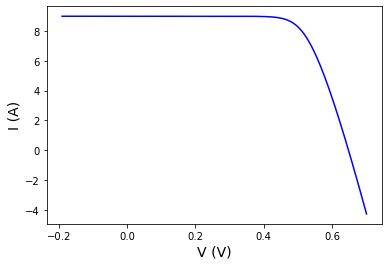

Solar cell with Imp=8.45A, Vmp=0.49V, FF=0.71, Efficiency=0.185


In [8]:
IL = 9
Rs = 0.01  # ohm
Rp = 1e10 # ohm

IV_curve = model_IV(IL, I0, n, Rs, Rp, temperature)
Pm, Vm, Im = get_Pmax(IV_curve)
Eff = Pm/(cell_area/10000*1000)
Voc = get_Voc(IV_curve)
Isc = get_Isc(IV_curve)
FF= Pm/(Isc*Voc)

# Plot the data
plt.plot(IV_curve[:,0], IV_curve[:,1], color='b')
plt.xlabel('V (V)', size=14)
plt.ylabel('I (A)', size=14)
plt.show()

# Report the values
sResult = ("Solar cell with " +
          "Imp=" + str(round(Im,2)) + "A, " +
          "Vmp=" + str(round(Vm,2)) + "V, " +
          "FF=" + str(round(FF,2))  + ", "
          "Efficiency=" + str(round(Eff,3)) )
print(sResult)

***Repeat steps 1 and 2 when the solar cell temperature is $T_{cell}$=35$^{\circ}°$C. At that temperature, $I_0$ = 4·10$^{-10}$ A.***

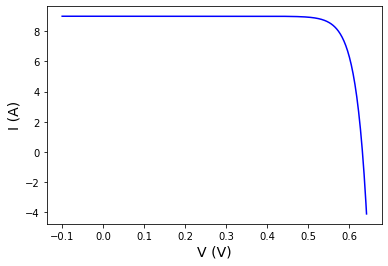

Solar cell with Imp=8.59A, Vmp=0.55V, FF=0.83, Efficiency=0.21


In [9]:
IL = 9
Rs = 0  # ohm
Rp = 1e10 # ohm
I0 = 4e-10 # A
temperature = 35 #ºC

IV_curve = model_IV(IL, I0, n, Rs, Rp, temperature)
Pm, Vm, Im = get_Pmax(IV_curve)
Eff = Pm/(cell_area/10000*1000)
Voc = get_Voc(IV_curve)
Isc = get_Isc(IV_curve)
FF= Pm/(Isc*Voc)

# Plot the data
plt.plot(IV_curve[:,0], IV_curve[:,1], color='b')
plt.xlabel('V (V)', size=14)
plt.ylabel('I (A)', size=14)
plt.show()

# Report the values
sResult = ("Solar cell with " +
          "Imp=" + str(round(Im,2)) + "A, " +
          "Vmp=" + str(round(Vm,2)) + "V, " +
          "FF=" + str(round(FF,2))  + ", "
          "Efficiency=" + str(round(Eff,3)) )
print(sResult)